## Проект  «Бета-Банк» - отток клиентов

### Описание проекта:
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. Целевой признак: Exited — факт ухода клиента

**Цель проекта:**

Сформировать модель, которая будет прогнозировать, уйдёт клиент из банка в ближайшее время или нет. Значение F1-меры должно быть не менее 0.59.


**План работы:**
1. Изучение данных
2. Предобаботка данных
3. Преобразование категориальных признаков техникой OHE
4. Исследование задачи (в т ч масштабирование данных)
5. Обучение моделей без учета дисбаланса классов
6. Применение 3х способов борьбы с дисбалансом
7. Тестирование модели
8. Итоговый вывод

## Изучение данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from IPython.display import display
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    precision_recall_curve,
    classification_report,
    roc_curve,
    roc_auc_score
)

In [3]:
data = pd.read_csv('/data/Churn.csv')
print(data.shape)
display(data.head(10))

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
for _ in [data]:
    print('Первые 5 строк:')
    display(_.head())
    print()
    print('Последние 5 строк:')
    display(_.tail())
    print()
    print('Общая информация по таблице:')
    print()
    print(_.info())
    print()
    print('Статистика по таблице:')
    display(_.describe(datetime_is_numeric=True))
    print()
    print('Всего явных дубликатов:', _.duplicated().sum())
    print()
    print('Количество пропусков:')
    display(_.isna().sum())
    print('Количество пропусков в %:')
    display(_.isna().mean()*100) 
    print('Нулевые значения:')
    print(_.isnull().sum())

Первые 5 строк:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0



Последние 5 строк:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0



Общая информация по таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None

Статистика по таблице:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



Всего явных дубликатов: 0

Количество пропусков:


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Количество пропусков в %:


RowNumber          0.00
CustomerId         0.00
Surname            0.00
CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.00
Tenure             9.09
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

Нулевые значения:
RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


In [6]:
print(data['CustomerId'].nunique())
print(data['Surname'].nunique())
print(data['Geography'].unique())
print(data['Gender'].unique())

10000
2932
['France' 'Spain' 'Germany']
['Female' 'Male']


In [7]:
print(data['CustomerId'].duplicated().sum())
print(data['Surname'].duplicated().sum())

0
7068


### Вывод:
1. Данные предствляют собой 10 000 строк, в каждой информация о клиенте банка
2. Колонка RowNumber(просто дублирует индексы с сдвигом на 1), CustomerId (дубликаты не обнаружены), Surname (дубликаты по фамилии присутствуют в большом колличестве, но т к по колонке с индентификатором дубликатов нет - выглядит правдоподобно) - не несут необходимой информации для исследования, можем их удалить.
3. Колонки Geography(3 уникальных значения), Gender(2 уникальных значения) - нужно категоризировать и привести к числовым значениям
4. Все данные признаки нужно стандартизировать (масштабировать)
5. В данных обнаружены:
* расхождения с хорошим стилем в названиях столбцов, нужно привести все столбцы к единому стилю
* 9% пропуски в одном столбце - Tenure (сколько лет человек является клиентом банка) возможно ошибка при выгрузке или данные отсутствовали изначально, проверим, т к такое количество повляет на исследование
6. Колонка Tenure - заменим тип данных на int
7. Аномалий и явных дубликатов не обнаружено

## Предобработка данных

### Исправление наименований столбцов

In [8]:
data = data.rename(columns=str.lower)
data = data.rename(columns={'rownumber' : 'row_number',
                            'customerid' : 'customer_id',
                            'creditscore' : 'credit_score',
                            'numofproducts' : 'num_of_products',
                            'hascrcard' : 'has_cr_card',
                            'isactivemember' : 'is_active_member',
                            'estimatedsalary' : 'estimated_salary',})
data.columns         

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

### Удаление ненужных столбцов

In [9]:
data = data.drop(['row_number', 'customer_id', 'surname'], axis=1)
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Обработка пропусков

In [10]:
data['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

Text(0.5, 1.0, 'Распределение по годам, Сколько лет человек является клиентом банка')

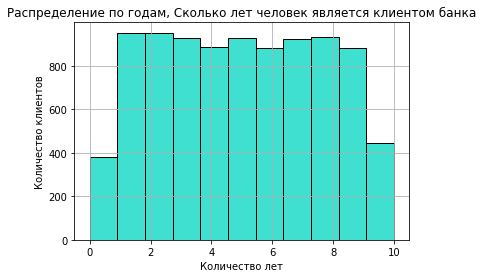

In [11]:
data['tenure'].hist(bins=11, color='turquoise',  edgecolor='black')
plt.xlabel('Количество лет')
plt.ylabel('Количество клиентов')
plt.title('Распределение по годам, Сколько лет человек является клиентом банка')

9% пропусков. Видим что медиана и среднее практически равны, но на графике распределение равномерное - если заполним значением медианы и средним - распределение сильно изменится, принято решение эти данные удалить, иначе может ощутимо повлиять на исследование. Изменим тип данных в этом столбце на int

In [10]:
data.dropna(subset=['tenure'], inplace=True)
data['tenure'] = data['tenure'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9091 non-null   int64  
 1   geography         9091 non-null   object 
 2   gender            9091 non-null   object 
 3   age               9091 non-null   int64  
 4   tenure            9091 non-null   int64  
 5   balance           9091 non-null   float64
 6   num_of_products   9091 non-null   int64  
 7   has_cr_card       9091 non-null   int64  
 8   is_active_member  9091 non-null   int64  
 9   estimated_salary  9091 non-null   float64
 10  exited            9091 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 852.3+ KB


###  Изменение типа данных

### Преобразование категориальных признаков техникой OHE

В столбцах geography gender категориальные данные, используем технику OHE, чтобы не попасть в дамми-ловушку, применим аргумент drop_first.

In [11]:
data = pd.get_dummies(data, drop_first=True)
display(data.head())

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
data.shape

(9091, 12)

### Вывод:
В ходе предобработки данных:
*  Все столбцы приведены к хорошему стилю
*  В столбце Tenure (сколько лет человек является клиентом банка) 9% пропусков - удалено. Возможно пропуски из-за ошибки при выгрузке или данные отсутствовали, либо это не заполненые данные новых клиентов - подтвердить не получилось - данные в сustomer_id не по-порядку от старых клиентов к новым. Нужно передать информацию ответственным - 9% пропусков многовато.
*  Типы данных заменены на соответствующие
*  Удалены ненужные столбцы - row_number, сustomer_id, surname
*  Преобразованы категориальные признаки техникой OHE (столбцы Geography(3 уникальных значения), Gender(2 уникальных значения))
*  Всего готово к исследованию - 9091 строк и 12 столбцов


## Исследование задачи

**Проверим соотношение значений целевого признака:**

In [13]:
data['exited'].value_counts()

0    7237
1    1854
Name: exited, dtype: int64

Видим ощутимый дисбаланс классов 80/20

### Деление данных на выборки

In [14]:
target = data['exited']
features = data.drop('exited', axis=1)
data_train, data_valid_test = train_test_split(
    data, test_size=0.40, random_state=12345)

data_test, data_valid = train_test_split(
    data_valid_test, test_size=0.50, random_state=12345)

print(data_train.shape)
print(data_test.shape)
print(data_valid.shape)

(5454, 12)
(1818, 12)
(1819, 12)


In [15]:
features_train = data_train.drop(['exited'], axis=1) 
target_train = data_train['exited']

features_valid = data_valid.drop(['exited'], axis=1) 
target_valid = data_valid['exited']

features_test = data_test.drop(['exited'], axis=1) 
target_test = data_test['exited']

**Итого получаем выборки:**
* Тренировочная выборка - 60% - features_train, target_train
* Валидационная выборка - 20% - features_valid , target_valid 
* Тестовая выборка - 20% - features_test, target_test

In [16]:
print('Cоотношение значений целевого признака, тренировочная выборка:') 
print(target_train.value_counts())
print('Cоотношение значений целевого признака, валидационная выборка:')
print(target_valid.value_counts()) 
print('Cоотношение значений целевого признака, тестовая выборка:') 
print(target_test.value_counts())

Cоотношение значений целевого признака, тренировочная выборка:
0    4328
1    1126
Name: exited, dtype: int64
Cоотношение значений целевого признака, валидационная выборка:
0    1468
1     351
Name: exited, dtype: int64
Cоотношение значений целевого признака, тестовая выборка:
0    1441
1     377
Name: exited, dtype: int64


### Масштабирование данных

Т к признаки сильно различаются по размеру чисел, необходимо масшабировать их для корректной работы модели. Для масштабирования признаков используем метод стандартизации данных - StandardScaler 

In [17]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_train.head())
display(features_valid.head())
display(features_test.head())

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9344,0.809075,-1.039327,-1.025995,0.554904,-0.908179,1,0,0.019508,0,0,0
3796,-1.152518,-1.227561,0.696524,0.480609,-0.908179,0,0,0.056167,0,0,1
7462,-0.398853,0.090079,1.385532,-1.237830,-0.908179,1,1,0.848738,0,0,1
1508,-0.749875,-0.286389,0.352020,-1.237830,0.809300,1,1,-0.894953,0,0,1
4478,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,0,1,-1.284516,0,0,1


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
5170,1.707279,-0.756975,-0.336987,-1.237830,0.809300,1,1,0.718362,0,0,0
4180,-0.429826,-0.286389,1.730036,0.485538,0.809300,0,0,1.687305,1,0,1
7349,-0.171721,0.278313,0.352020,-0.269213,0.809300,0,1,0.824128,1,0,1
7469,0.385784,-0.380507,1.041028,0.464813,-0.908179,1,0,-1.118018,0,0,0
3467,-1.142194,0.278313,-1.370498,0.353837,0.809300,0,1,-0.107642,1,0,0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7445,-1.369326,0.560665,-0.336987,-1.237830,-0.908179,1,0,-0.086537,0,0,0
8620,1.232367,0.090079,1.041028,-1.237830,0.809300,0,1,-0.537457,0,0,0
1714,0.840048,0.560665,0.352020,1.231363,-0.908179,0,0,1.070393,1,0,1
5441,1.056856,-0.945210,-1.370498,0.951231,-0.908179,1,0,-0.576279,0,0,1
9001,0.406433,-0.662858,0.352020,0.767800,-0.908179,1,1,0.662068,0,1,1


### Обучение моделей без учета дисбаланса классов

#### Дерево решений

In [18]:
%%time
best_model = None
best_depth = 0
best_f1 = 0
best_auc_roc = 0


for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=7) 
    model.fit(features_train, target_train)
    prediction_valid = model.predict(features_valid)
    f1_valid = f1_score(prediction_valid, target_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid) 
    if f1_valid > best_f1:
            best_model = model
            best_depth = depth
            best_f1 = f1_valid
            best_auc_roc = auc_roc_valid
            
print('Лучшая модель дерева решений:', best_model)
print('Лучшая глубина для модели дерева решений:', best_depth)
print('F1-мера лучшей модели дерева решений на валидационной выборке:', best_f1)            
print('AUC-ROC лучшей модели дерева решений на валидационной выборке:', best_auc_roc)            
            

Лучшая модель дерева решений: DecisionTreeClassifier(max_depth=12, min_samples_leaf=7, random_state=12345)
Лучшая глубина для модели дерева решений: 12
F1-мера лучшей модели дерева решений на валидационной выборке: 0.5741324921135647
AUC-ROC лучшей модели дерева решений на валидационной выборке: 0.8052547412220438
CPU times: user 419 ms, sys: 1.97 ms, total: 421 ms
Wall time: 434 ms


#### Логистическая регрессия

In [19]:
%%time
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

prediction_valid = model.predict(features_valid)
f1_valid = f1_score(prediction_valid, target_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid)

print('F1-мера модели логистической регрессии на валидационной выборке:', f1_valid)            
print('AUC-ROC модели логистической регрессии на валидационной выборке:', auc_roc_valid) 

F1-мера модели логистической регрессии на валидационной выборке: 0.3175965665236052
AUC-ROC модели логистической регрессии на валидационной выборке: 0.780939239386106
CPU times: user 36.1 ms, sys: 34.3 ms, total: 70.4 ms
Wall time: 33.2 ms


#### Случайный лес

In [20]:
%%time
best_model = None
best_depth = 0
best_est = 0
best_f1 = 0
best_auc_roc = 0

for depth in range (1, 20):
    for est in range(1, 130, 10):
        model = RandomForestClassifier(random_state=12345, criterion='gini', n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train)
        prediction_valid = model.predict(features_valid)
        f1_valid = f1_score(prediction_valid, target_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid) 
        if f1_valid > best_f1:
                best_model = model
                best_depth = depth
                best_est = est
                best_f1 = f1_valid
                best_auc_roc = auc_roc_valid
            
print('Лучшая модель случайного леса:', best_model)
print('Лучшая глубина для модели случайный лес:', best_depth)
print('Лучшее количество деревьев для модели случайный лес:',  best_est)
print('F1-мера лучшей модели случайный лес на валидационной выборке:', best_f1)            
print('AUC-ROC лучшей модели случайный лес на валидационной выборке:', best_auc_roc)     
        

Лучшая модель случайного леса: RandomForestClassifier(max_depth=15, n_estimators=81, random_state=12345)
Лучшая глубина для модели случайный лес: 15
Лучшее количество деревьев для модели случайный лес: 81
F1-мера лучшей модели случайный лес на валидационной выборке: 0.590339892665474
AUC-ROC лучшей модели случайный лес на валидационной выборке: 0.8549628542816554
CPU times: user 1min 18s, sys: 573 ms, total: 1min 18s
Wall time: 1min 19s


### Вывод:
Выявлен значительный дисбаланс классов в целевом признаке (80/20)
4. Данные поделены на выборки:
*  Тренировочная выборка - 60% - features_train, target_train
*  Валидационная выборка - 20% - features_valid , target_valid
*  Тестовая выборка - 20% - features_test, target_test
5. Т к признаки сильно различаются по размеру чисел, масшабировали их для корректной работы модели. Для масштабирования признаков использовали метод стандартизации данных - StandardScaler
6. Изучены модели без учёта дисбаланса по метрикам F1-меры и AUC-ROC:
*  Лучшие показатели F1-меры и AUC-ROC у моделей случайного леса (0.590 и 0.854) и дерева решений (0.574 и 0.805)
*  У логистическрой регрессии очень низкий показатель F1-меры (0.317)

## Борьба с дисбалансом

### Способ №1. Аргумент "class_weight "

#### Дерево решений

In [21]:
%%time
best_model = None
best_depth = 0
best_f1 = 0
best_auc_roc = 0


for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=7, class_weight='balanced') 
    model.fit(features_train, target_train)
    prediction_valid = model.predict(features_valid)
    f1_valid = f1_score(prediction_valid, target_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid) 
    if f1_valid > best_f1:
            best_model = model
            best_depth = depth
            best_f1 = f1_valid
            best_auc_roc = auc_roc_valid
            
print('Лучшая модель дерева решений:', best_model)
print('Лучшая глубина для модели дерева решений:', best_depth)
print('F1-мера лучшей модели дерева решений на валидационной выборке:', best_f1)            
print('AUC-ROC лучшей модели дерева решений на валидационной выборке:', best_auc_roc)            
            

Лучшая модель дерева решений: DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=7,
                       random_state=12345)
Лучшая глубина для модели дерева решений: 5
F1-мера лучшей модели дерева решений на валидационной выборке: 0.5659955257270692
AUC-ROC лучшей модели дерева решений на валидационной выборке: 0.8374777785540728
CPU times: user 441 ms, sys: 0 ns, total: 441 ms
Wall time: 446 ms


#### Логистическая регрессия

In [22]:
%%time
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)

prediction_valid = model.predict(features_valid)
f1_valid = f1_score(prediction_valid, target_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid)

print('F1-мера модели логистической регрессии на валидационной выборке:', f1_valid)            
print('AUC-ROC модели логистической регрессии на валидационной выборке:', auc_roc_valid)

F1-мера модели логистической регрессии на валидационной выборке: 0.5025432349949135
AUC-ROC модели логистической регрессии на валидационной выборке: 0.7817621121435836
CPU times: user 30.4 ms, sys: 35.3 ms, total: 65.7 ms
Wall time: 20.3 ms


#### Случайный лес

In [23]:
%%time
best_model = None
best_depth = 0
best_est = 0
best_f1 = 0
best_auc_roc = 0

for depth in range (1, 20):
    for est in range(1, 130, 10):
        model = RandomForestClassifier(random_state=12345, criterion='gini', 
                                       n_estimators=est, max_depth=depth, class_weight='balanced') 
        model.fit(features_train, target_train)
        prediction_valid = model.predict(features_valid)
        f1_valid = f1_score(prediction_valid, target_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid) 
        if f1_valid > best_f1:
                best_model = model
                best_depth = depth
                best_est = est
                best_f1 = f1_valid
                best_auc_roc = auc_roc_valid
            
print('Лучшая модель случайного леса:', best_model)
print('Лучшая глубина для модели случайный лес:', best_depth)
print('Лучшее количество деревьев для модели случайный лес:',  best_est)
print('F1-мера лучшей модели случайный лес на валидационной выборке:', best_f1)            
print('AUC-ROC лучшей модели случайный лес на валидационной выборке:', best_auc_roc)     

Лучшая модель случайного леса: RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=31,
                       random_state=12345)
Лучшая глубина для модели случайный лес: 11
Лучшее количество деревьев для модели случайный лес: 31
F1-мера лучшей модели случайный лес на валидационной выборке: 0.6169895678092399
AUC-ROC лучшей модели случайный лес на валидационной выборке: 0.8500818991282207
CPU times: user 1min 19s, sys: 400 ms, total: 1min 19s
Wall time: 1min 20s


### Способ №2. Увеличение выборки техникой "upsampling" 

Создадим функцию для увеличения тренировочной выборки и проверим качество моделей на этой выборке:

In [24]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)


print(features_upsampled.shape)
print(target_upsampled.shape)


(8832, 11)
(8832,)


#### Дерево решений

In [25]:
%%time
best_model = None
best_depth = 0
best_f1 = 0
best_auc_roc = 0


for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=7) 
    model.fit(features_upsampled, target_upsampled)
    prediction_valid = model.predict(features_valid)
    f1_valid = f1_score(prediction_valid, target_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid) 
    if f1_valid > best_f1:
            best_model = model
            best_depth = depth
            best_f1 = f1_valid
            best_auc_roc = auc_roc_valid
            
print('Лучшая модель дерева решений:', best_model)
print('Лучшая глубина для модели дерева решений:', best_depth)
print('F1-мера лучшей модели дерева решений на валидационной выборке:', best_f1)            
print('AUC-ROC лучшей модели дерева решений на валидационной выборке:', best_auc_roc) 

Лучшая модель дерева решений: DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=12345)
Лучшая глубина для модели дерева решений: 5
F1-мера лучшей модели дерева решений на валидационной выборке: 0.5659955257270692
AUC-ROC лучшей модели дерева решений на валидационной выборке: 0.8387324654354628
CPU times: user 508 ms, sys: 0 ns, total: 508 ms
Wall time: 517 ms


#### Логистическая регрессия

In [26]:
%%time
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

prediction_valid = model.predict(features_valid)
f1_valid = f1_score(prediction_valid, target_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid)

print('F1-мера модели логистической регрессии на валидационной выборке:', f1_valid)            
print('AUC-ROC модели логистической регрессии на валидационной выборке:', auc_roc_valid)

F1-мера модели логистической регрессии на валидационной выборке: 0.49653808110781406
AUC-ROC модели логистической регрессии на валидационной выборке: 0.7817349418166857
CPU times: user 29.8 ms, sys: 19.9 ms, total: 49.8 ms
Wall time: 29.9 ms


#### Случайный лес

In [27]:
%%time
best_model = None
best_depth = 0
best_est = 0
best_f1 = 0
best_auc_roc = 0

for depth in range (1, 20):
    for est in range(1, 130, 10):
        model = RandomForestClassifier(random_state=12345, criterion='gini', 
                                       n_estimators=est, max_depth=depth) 
        model.fit(features_upsampled, target_upsampled)
        prediction_valid = model.predict(features_valid)
        f1_valid = f1_score(prediction_valid, target_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid) 
        if f1_valid > best_f1:
                best_model = model
                best_depth = depth
                best_est = est
                best_f1 = f1_valid
                best_auc_roc = auc_roc_valid
            
print('Лучшая модель случайного леса:', best_model)
print('Лучшая глубина для модели случайный лес:',  best_depth )
print('Лучшее количество деревьев для модели случайный лес:', best_est)
print('F1-мера лучшей модели случайный лес на валидационной выборке:', best_f1)            
print('AUC-ROC лучшей модели случайный лес на валидационной выборке:', best_auc_roc)     

Лучшая модель случайного леса: RandomForestClassifier(max_depth=18, n_estimators=111, random_state=12345)
Лучшая глубина для модели случайный лес: 18
Лучшее количество деревьев для модели случайный лес: 111
F1-мера лучшей модели случайный лес на валидационной выборке: 0.6216216216216216
AUC-ROC лучшей модели случайный лес на валидационной выборке: 0.8491784857588672
CPU times: user 1min 44s, sys: 571 ms, total: 1min 44s
Wall time: 1min 44s


### Способ №3. Уменьшение выборки техникой "downsampling" 

Создадим функцию для увеличения тренировочной выборки и проверим качество моделей на этой выборке:

In [28]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)


(2208, 11)
(2208,)


#### Дерево решений

In [29]:
%%time
best_model = None
best_depth = 0
best_f1 = 0
best_auc_roc = 0


for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=7) 
    model.fit(features_downsampled, target_downsampled)
    prediction_valid = model.predict(features_valid)
    f1_valid = f1_score(prediction_valid, target_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid) 
    if f1_valid > best_f1:
            best_model = model
            best_depth = depth
            best_f1 = f1_valid
            best_auc_roc = auc_roc_valid
            
print('Лучшая модель дерева решений:', best_model)
print('Лучшая глубина для модели дерева решений:', best_depth)
print('F1-мера лучшей модели дерева решений на валидационной выборке:', best_f1)            
print('AUC-ROC лучшей модели дерева решений на валидационной выборке:', best_auc_roc) 

Лучшая модель дерева решений: DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, random_state=12345)
Лучшая глубина для модели дерева решений: 6
F1-мера лучшей модели дерева решений на валидационной выборке: 0.5553359683794467
AUC-ROC лучшей модели дерева решений на валидационной выборке: 0.8373002010604191
CPU times: user 228 ms, sys: 3.96 ms, total: 232 ms
Wall time: 242 ms


#### Логистическая регрессия

In [30]:
%%time
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)

prediction_valid = model.predict(features_valid)
f1_valid = f1_score(prediction_valid, target_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid)

print('F1-мера модели логистической регрессии на валидационной выборке:', f1_valid)            
print('AUC-ROC модели логистической регрессии на валидационной выборке:', auc_roc_valid)

F1-мера модели логистической регрессии на валидационной выборке: 0.4911591355599214
AUC-ROC модели логистической регрессии на валидационной выборке: 0.7806655953794919
CPU times: user 14.9 ms, sys: 35.8 ms, total: 50.6 ms
Wall time: 14 ms


#### Случайный лес

In [31]:
%%time
best_model = None
best_depth = 0
best_est = 0
best_f1 = 0
best_auc_roc = 0

for depth in range (1, 20):
    for est in range(1, 130, 10):
        model = RandomForestClassifier(random_state=12345, criterion='gini', 
                                       n_estimators=est, max_depth=depth) 
        model.fit(features_downsampled, target_downsampled)
        prediction_valid = model.predict(features_valid)
        f1_valid = f1_score(prediction_valid, target_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc_valid = roc_auc_score (target_valid, probabilities_one_valid) 
        if f1_valid > best_f1:
                best_model = model
                best_depth = depth
                best_est = est
                best_f1 = f1_valid
                best_auc_roc = auc_roc_valid
            
print('Лучшая модель случайного леса:', best_model)
print('Лучшая глубина для модели случайный лес:', best_depth)
print('Лучшее количество деревьев для модели случайный лес:', best_est)
print('F1-мера лучшей модели случайный лес на валидационной выборке:', best_f1)            
print('AUC-ROC лучшей модели случайный лес на валидационной выборке:', best_auc_roc)     

Лучшая модель случайного леса: RandomForestClassifier(max_depth=5, n_estimators=11, random_state=12345)
Лучшая глубина для модели случайный лес: 5
Лучшее количество деревьев для модели случайный лес: 11
F1-мера лучшей модели случайный лес на валидационной выборке: 0.5825892857142857
AUC-ROC лучшей модели случайный лес на валидационной выборке: 0.8475045995481962
CPU times: user 47.9 s, sys: 336 ms, total: 48.3 s
Wall time: 48.4 s


### Вывод:

1. В нашем случае лучше всего себя показал способ увеличение выборки техникой "upsampling" - на модели случайный лес на валидационной выборке показатели следущие:
*  F1-мера лучшей модели случайный лес на валидационной выборке: 0.6216216216216216
*  AUC-ROC лучшей модели случайный лес на валидационной выборке: 0.8491784857588672
2. Случайный лес с аргументом "class_weight" дает второй по качеству результат:
*  F1-мера лучшей модели случайный лес на валидационной выборке: 0.6169895678092399
*  AUC-ROC лучшей модели случайный лес на валидационной выборке: 0.8500818991282207
3. Худшие результаты по всем моделям у техники "downsampling"
4. В целом, наиболее качественный результат показала модель случайного леса с гиперпараметрами: 
*  criterion='gini'
*  n_estimators=111
*  max_depth=18

на ней и протестируем тестовую выборку с увеличением выборки техникой "upsampling

## Тестирование модели

In [32]:
%%time
model = RandomForestClassifier(random_state=12345, criterion='gini', 
                                       n_estimators=111, max_depth=18) 
model.fit(features_upsampled, target_upsampled)
prediction_test = model.predict(features_test)
f1_test = f1_score(prediction_test, target_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_test = roc_auc_score (target_test, probabilities_one_test) 
recall_test = recall_score(prediction_test, target_test)        
           

print('F1-мера лучшей модели случайный лес на тестовой выборке:', f1_test)            
print('AUC-ROC лучшей модели случайный лес на тестовой выборке:', auc_roc_test)
print('recall (полнота) лучшей модели случайный лес на тестовой выборке:', recall_test)

F1-мера лучшей модели случайный лес на тестовой выборке: 0.6269956458635705
AUC-ROC лучшей модели случайный лес на тестовой выборке: 0.8601739140038691
recall (полнота) лучшей модели случайный лес на тестовой выборке: 0.6923076923076923
CPU times: user 1.02 s, sys: 4 ms, total: 1.02 s
Wall time: 1.02 s


**Рассмотрим график ROC-кривой:**

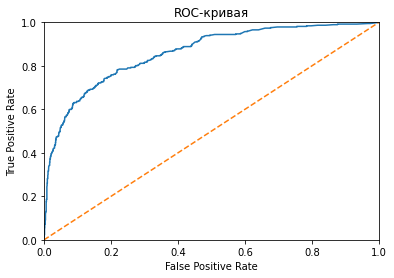

In [33]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


Создадим дамми-модель для сравнения F1-меры. В дамми-модели предскажем везде «1». Условно говоря, если предсказываем ноль, моделируем ситуацию, когда акцию с бонусами для удержания клиентов решили не проводить. Если предсказываем единицу − решили раздать бонусы вообще всем клиентам. Если в дамми-модели предсказываем по единице, можно подсчитать F1, она не будет зануляться.

In [34]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_dummy_test = f1_score(dummy_model.predict(features_test), target_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_dummy_test = roc_auc_score (target_test, probabilities_one_test) 
        
print('F1-мера дамми-модели:',f1_dummy_test)              

F1-мера дамми-модели: 0.34350797266514804


## Итоговый вывод:

**1. По итогу исследования для финального тестирования выбрана модель случайный лес с увеличением выборки техникой "upsampling" и с гиперпараметрами:** 
*  criterion='gini' 
*  n_estimators=111 
*  max_depth=18 

**2. На тестовой выборке показатели следущие:**
*  F1-мера лучшей модели случайный лес на тестовой выборке: 0.6269956458635705
*  AUC-ROC лучшей модели случайный лес на тестовой выборке: 0.8601739140038691

**3. На графике ROC-кривой видим, что AUC-ROC модели случайный лес (0.8601739140038691) ощутимо превышает AUC-ROC случайной модели (0.5).**

**4. F1-мера дамми-модели с constant=1: 0.34350797266514804 - почти в 2 раза меньше чем 0.6269956458635705, что говорит нам о том что модель случайный лес на тестовой выборке более чем адекватна.**

**5. Recall (полнота) лучшей модели случайный лес на тестовой выборке: 0.6923076923076923, это указывает на то, что модель верно детектирует почти 70% клиентов на отток**